# PROJETO DE ANÁLISE DE DADOS

CASE: TRABALHO REMOTO E SAÚDE MENTAL.

COM O AUXILIO DA PLATAFORMA KAGGLE, IREMOS EXPLORAR UMA BASE DE DADOS REFERENTE AO TRABALHO REMOTO E SAÚDE MENTAL, ENCONTRAR PADRÕES E IDENTIFICAR CORRELAÇÕES ENTRE TIPOS DE INFORMAÇÕES;

PERGUNTAS A SEREM RESPONDIDAS?

1 - Funcionários que trabalham remotamente relatam mais condições de saúde mental (ansiedade, depressão, etc.) em comparação com os que trabalham presencialmente?

2 - Relação entre o gênero/idade e o nível de estresse/probabilidade de desenvolver uma condição de saúde mental no trabalho remoto?

3 - Relação entre a produtividade dos funcionários e as condicões da jornada!

A partir de uma série de análises, vamos destrinchar uma grande base de dados para entregar insights a cerca do tema citado!


- Em primeiro lugar, precisamos importar a base de dados para o ambiente de desenvolvimento!

In [269]:

import pandas as pd
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
display(df)

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


- Agora vamos começar a fazer o tratamento desses dados!
- Precisamos fazer a limpeza dos dados, remover algumas colunas que não vão nos ajudar nas nossas análises, achar dados faltantes(missing values) e duplicados(duplicated) e renomear as colunas para o nosso idioma!

In [270]:
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [271]:
#Aqui vamos começar por identificar os valores duplicados
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)


Empty DataFrame
Columns: [Employee_ID, Age, Gender, Job_Role, Industry, Years_of_Experience, Work_Location, Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resources, Productivity_Change, Social_Isolation_Rating, Satisfaction_with_Remote_Work, Company_Support_for_Remote_Work, Physical_Activity, Sleep_Quality, Region]
Index: []


- Não encontramos valores duplicados na base de dados!
- Isso é excelente pois é um dos processos da limpeza de dados essenciais para começarmos a analisar!

In [272]:
# Valores ausentes nas colunas - soma deles.
missing_values = df.isnull().sum()
print(missing_values)


Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64


- Encontramos valores faltantes(NaN) em mais de mil linhas tanto na Mental_Health_Condition, quanto na Physical_Activity, precisamos eliminar essas linhas faltantes!
- Porem remover todas essas linhas resultaria numa análise um tanto errada, pois são mais de 2500 registros, um número significativo. Então vamos alterar o valor que consta como NaN para simplesmente "-".

In [273]:
# Preencher valores ausentes com "-"
df.fillna("Não Especificado", inplace=True)

# Ver número de valores ausentes após o preenchimento
print("Valores ausentes depois de preencher:")
print(df.isnull().sum())



Valores ausentes depois de preencher:
Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64


In [274]:
# Vamos então remover algumas colunas que julgo não serem diretamente necessárias para o contexto da análise e das questões a serem sanadas!
# Índices das colunas que você deseja remover
# Substitui pelos índices corretos
colunas_para_remover_indices = [0,3,4,14,17,18,19]  # Exemplo de índices

# Remove as colunas usando os índices
df.drop(df.columns[colunas_para_remover_indices], axis=1, inplace=True)

# Exibe o DataFrame atualizado
display(df)

,Age,Gender,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work
0,32,Non-binary,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,Unsatisfied,1
1,40,Female,3,Remote,52,4,1,Medium,Anxiety,No,Increase,Satisfied,2
2,59,Non-binary,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,Unsatisfied,5
3,27,Male,20,Onsite,32,8,4,High,Depression,Yes,Increase,Unsatisfied,3
4,49,Male,32,Onsite,35,12,2,High,Não Especificado,Yes,Decrease,Unsatisfied,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,Neutral,1
4996,39,Female,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,Satisfied,1
4997,42,Female,21,Hybrid,34,1,4,High,Burnout,No,Increase,Satisfied,1
4998,27,Female,26,Remote,58,0,5,Low,Não Especificado,Yes,Increase,Unsatisfied,4


In [275]:
df.rename(columns={'Age': 'Idade', 'Gender': 'Gênero', 'Years_of_Experience': 'Anos_Experiencia', 'Work_Location': 'Local_Trabalho', 'Hours_Worked_Per_Week': 'Horas_Semana','Number_of_Virtual_Meetings': 'Reuniões_Virtuais', 'Work_Life_Balance_Rating':'Vida_Pessoal_Trabalho', 'Stress_Level': 'Nivel_Estresse', 'Mental_Health_Condition':'Saúde_Mental', 'Access_to_Mental_Health_Resources': 'Suporte_Saude_Mental','Productivity_Change': 'Mudança_Produtividade','Satisfaction_with_Remote_Work':'Satisfação_Trabalho_Remoto', 'Company_Support_for_Work': 'Suporte_Empresa_Remoto'}, inplace=True)
df['Gênero'] = df['Gênero'].map({'Male': 'Masculino', 'Female': 'Feminino','Non-binary': 'Não Binário'})
df['Local_Trabalho'] = df ['Local_Trabalho'].map({'Hybrid': 'Híbrido', 'Remote':'Remoto','Onsite':'Presencial'})
df['Nivel_Estresse'] = df ['Nivel_Estresse'].map({'Low': 'Baixo', 'Medium': 'Médio', 'High': 'Alto'})
df['Saúde_Mental'] = df ['Saúde_Mental'].map({'Depression':'Depressão','Anxiety':'Ansiedade','Burnout':'Burnout','Não Especificado':'Não Especificado'})
df['Suporte_Saude_Mental'] = df ['Suporte_Saude_Mental'].map({'No':'Não','Yes':'Sim'})
df['Mudança_Produtividade'] = df ['Mudança_Produtividade'].map({'Decrease':'Diminuição','Increase':'Aumento','No Change':'Sem mudança'})
df['Satisfação_Trabalho_Remoto'] = df ['Satisfação_Trabalho_Remoto'].map({'Unsatisfied':'Insatisfeito','Satisfied':'Satisfeito','Neutral':'Neutro'})


display(df)


,Idade,Gênero,Anos_Experiencia,Local_Trabalho,Horas_Semana,Reuniões_Virtuais,Vida_Pessoal_Trabalho,Nivel_Estresse,Saúde_Mental,Suporte_Saude_Mental,Mudança_Produtividade,Satisfação_Trabalho_Remoto,Company_Support_for_Remote_Work
0,32,Não Binário,13,Híbrido,47,7,2,Médio,Depressão,Não,Diminuição,Insatisfeito,1
1,40,Feminino,3,Remoto,52,4,1,Médio,Ansiedade,Não,Aumento,Satisfeito,2
2,59,Não Binário,22,Híbrido,46,11,5,Médio,Ansiedade,Não,Sem mudança,Insatisfeito,5
3,27,Masculino,20,Presencial,32,8,4,Alto,Depressão,Sim,Aumento,Insatisfeito,3
4,49,Masculino,32,Presencial,35,12,2,Alto,Não Especificado,Sim,Diminuição,Insatisfeito,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Masculino,4,Presencial,24,2,5,Alto,Burnout,Sim,Diminuição,Neutro,1
4996,39,Feminino,27,Presencial,48,15,1,Baixo,Depressão,Sim,Diminuição,Satisfeito,1
4997,42,Feminino,21,Híbrido,34,1,4,Alto,Burnout,Não,Aumento,Satisfeito,1
4998,27,Feminino,26,Remoto,58,0,5,Baixo,Não Especificado,Sim,Aumento,Insatisfeito,4


# Distribuição Normal dos casos de Ansiedade, Depressão e Burnout
 
 **Nessa etapa, vamos analisar a incidência de condições de sáude mental como ansiedade, depressão e burnout nas diferentes modalidades de local de trabalho.**

 

In [309]:
mental_health_distribution = df.groupby('Local_Trabalho')['Saúde_Mental'].value_counts(normalize=True).unstack() * 100
mental_health_distribution_df = pd.DataFrame(mental_health_distribution).style.format("{:.2f}%")
display(mental_health_distribution_df)


Saúde_Mental,Ansiedade,Burnout,Depressão,Não Especificado
Local_Trabalho,,,,
Híbrido,25.96%,24.26%,25.53%,24.26%
Presencial,24.86%,27.00%,25.17%,22.97%
Remoto,25.85%,25.55%,24.10%,24.50%


Na célula de código acima, podemos inferir através da distribuição normal estatística que a proporção de casos de Sindrome de Burnout está maior para o regime de trabalho presencial (27% dos casos), enquanto a proporção nos casos de depressão está em torno de 24,10% no trabalho remoto, enquanto essa taxa está mais alta no modelo híbrido (25.53%).

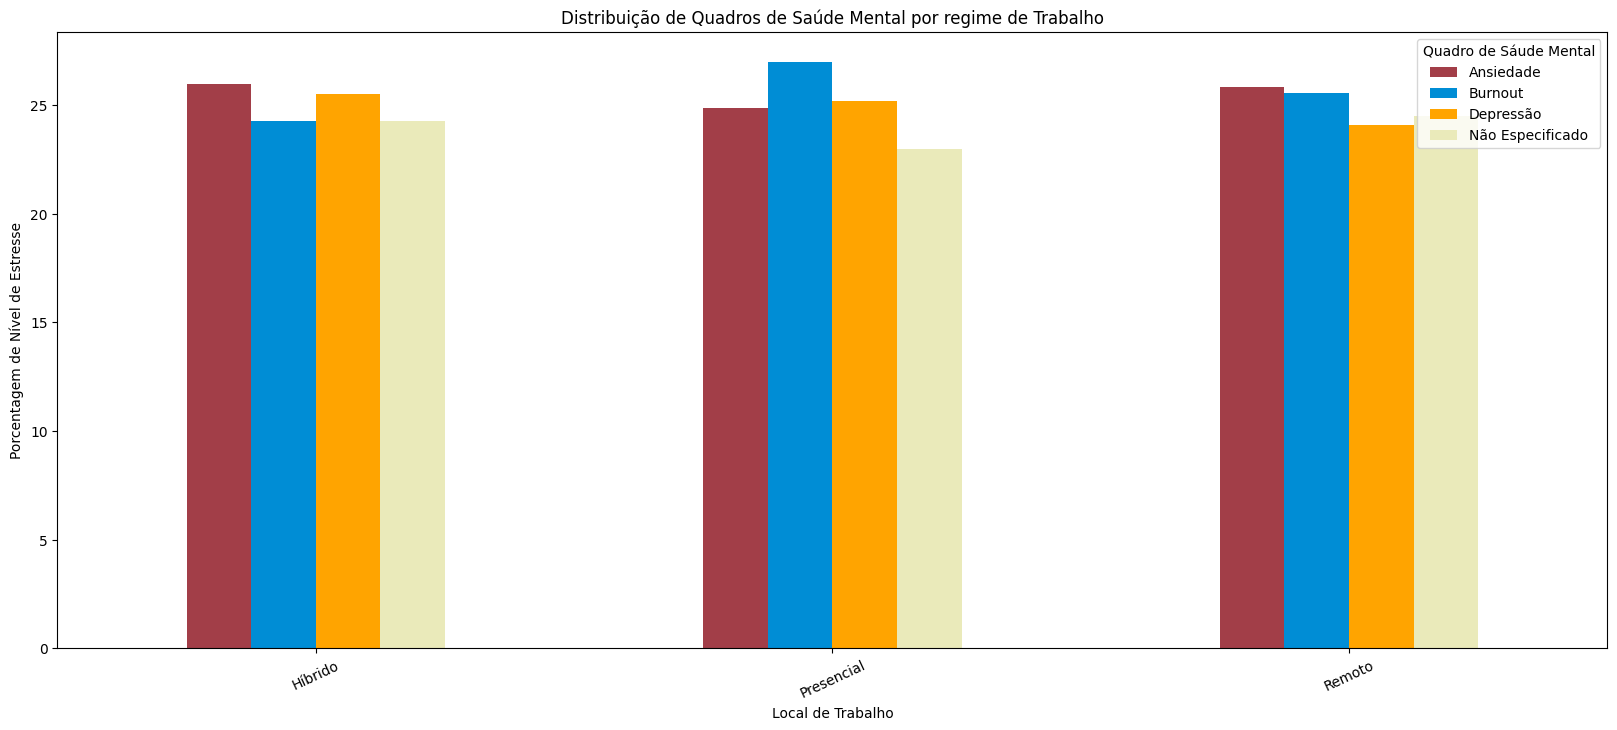

In [310]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['#A23E48', '#008DD5', '#FFA400','#EAEABA'] 

mental_health_distribution.plot(kind='bar', figsize=(20, 8), color = colors)
plt.title("Distribuição de Quadros de Saúde Mental por regime de Trabalho")
plt.xlabel("Local de Trabalho")
plt.ylabel("Porcentagem de Nível de Estresse")
plt.xticks(rotation=25)
plt.legend(title="Quadro de Sáude Mental")
plt.show()

In [311]:
stress_by_location = df.groupby('Local_Trabalho')['Nivel_Estresse'].value_counts()
stress_by_location_df = pd.DataFrame(stress_by_location)
display(stress_by_location_df)


count
Local_Trabalho Nivel_Estresse       
Híbrido        Alto              561
               Médio             545
               Baixo             543
Presencial     Baixo             555
               Médio             547
               Alto              535
Remoto         Alto              590
               Médio             577
               Baixo             547

In [312]:
stress_percentage = df.groupby('Local_Trabalho')['Nivel_Estresse'].value_counts(normalize=True).unstack() * 100
stress_percentage_df = pd.DataFrame(stress_percentage).style.format("{:.2f}%")
stress_percentage_df


Nivel_Estresse,Alto,Baixo,Médio
Local_Trabalho,,,
Híbrido,34.02%,32.93%,33.05%
Presencial,32.68%,33.90%,33.41%
Remoto,34.42%,31.91%,33.66%


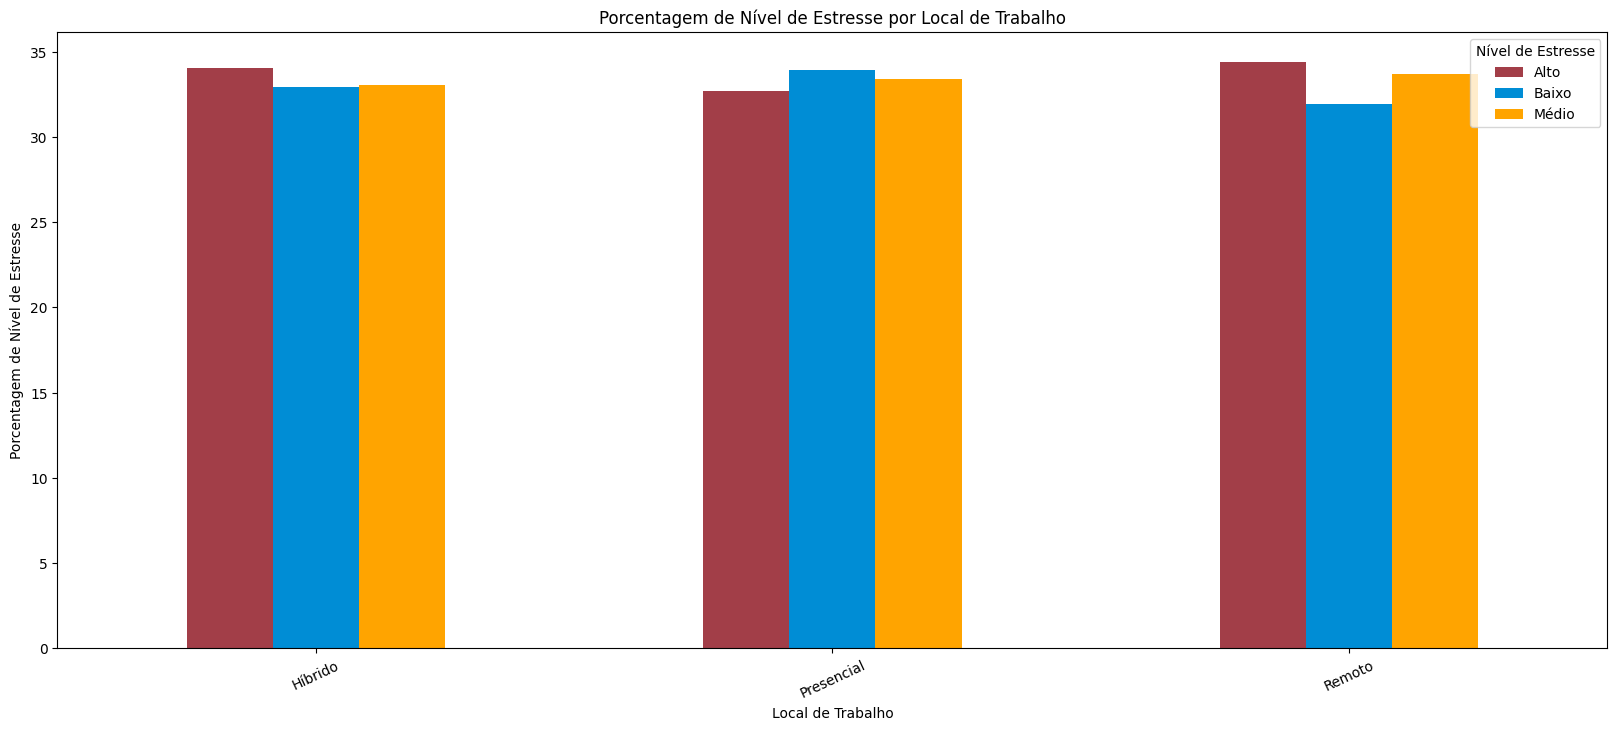

In [313]:
import seaborn as sns

# Nível de estresse / Modalidades de trabalho
colors = ['#A23E48', '#008DD5', '#FFA400'] 

stress_percentage.plot(kind='bar', figsize=(20, 8), color = colors)
plt.title("Porcentagem de Nível de Estresse por Local de Trabalho")
plt.xlabel("Local de Trabalho")
plt.ylabel("Porcentagem de Nível de Estresse")
plt.xticks(rotation=25)
plt.legend(title="Nível de Estresse")
plt.show()


Através dos artificio da visualização de dados com a biblioteca Matplotlib e Seaborn, conseguimos esboçar o mapa de calor da Distribuição de quadros de Saúde Mental e o gráfico de porcentagem de nível de estresse dentro dos diferentes regimes de trabalho. Analisando os dados acima, é possível concluir que para essa parcela da amostra, funcionários que trabalham remotamente, são submetidos a altos níveis de estresse, tendo uma probabilidade maior de desenvolverem ansiedade. Já depressão e Burnout são mais comuns de serem desenvolvidos no ambiente presencial de trabalho, embora os números estejam bem próximos!

# Idade/Gênero e Estresse e Doenças Mentais

Como estou seguindo a base de distribuição normal estatística para essas análises, vou coletar as faixas de idade e comparar a proporção de casos de quadros de saúde mental e nível de estresse.

In [314]:
bins = [20,30,40,50,60]
labels = ['20-30','30-40','40-50','50-60']

df['Faixa_Etaria'] = pd.cut(df['Idade'], bins = bins, labels = labels, right= False)
mental_health_Age = df.groupby('Faixa_Etaria', observed= False)['Saúde_Mental'].value_counts(normalize=True).unstack() * 100
mental_health_Age_df = pd.DataFrame(mental_health_Age).style.format("{:.2f}%")
display(mental_health_Age_df)

Saúde_Mental,Ansiedade,Burnout,Depressão,Não Especificado
Faixa_Etaria,,,,
20-30,26.33%,26.23%,23.82%,23.63%
30-40,24.17%,24.49%,26.84%,24.49%
40-50,26.33%,26.25%,24.58%,22.84%
50-60,25.41%,25.41%,24.47%,24.71%


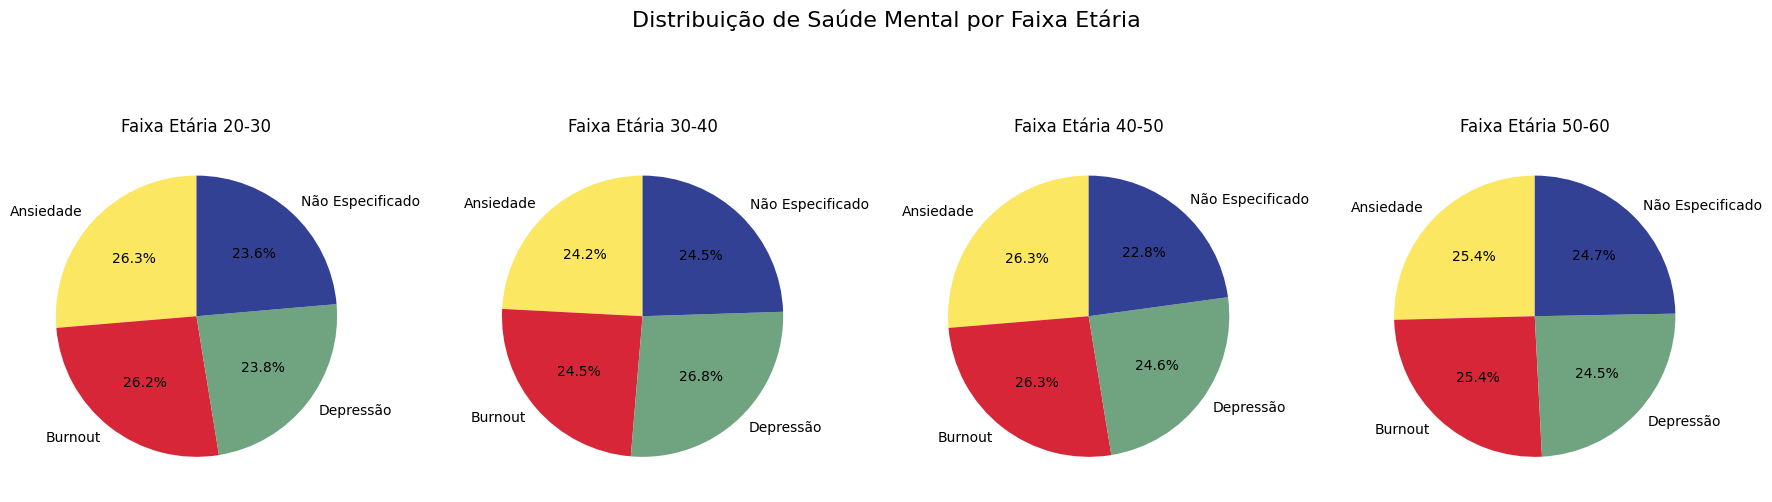

In [315]:
import matplotlib.pyplot as plt

colors = ['#FCE762','#D72638','#70A37F','#334195']

# Configurações de layout para múltiplos gráficos de setores
fig, axes = plt.subplots(1, len(mental_health_Age.index), figsize=(18, 6))


# Loop para criar um gráfico de setor para cada faixa etária
for i, age_group in enumerate(mental_health_Age.index):
    ax = axes[i]  # Seleciona o subplot
    mental_health_Age.loc[age_group].plot(
        kind='pie', 
        autopct='%1.1f%%', 
        startangle=90, 
        ax=ax,
        colors = colors,
        legend=False
    )
    ax.set_title(f"Faixa Etária {age_group}")
    ax.set_ylabel("")  # Remove o label do eixo y

# Título geral do gráfico
plt.suptitle("Distribuição de Saúde Mental por Faixa Etária", fontsize=16)
plt.tight_layout()
plt.show()


**Podemos observar que a faixa etária dos 20-30 anos e a dos 40-50 anos estão tecnicamente empatadas no que tange os quadros de Sáude Mental: Ansiedade e Burnout (Esgotamento Profissional).  Interessante ressaltar também que pessoas na faixa dos 30-40 anos tem maiores indices de Depressão.**

In [316]:
mental_health_Gender = df.groupby('Gênero', observed= False)['Saúde_Mental'].value_counts(normalize=True).unstack() * 100
mental_health_Gender_df = pd.DataFrame(mental_health_Gender).style.format("{:.2f}%")
display(mental_health_Gender_df)


Saúde_Mental,Ansiedade,Burnout,Depressão,Não Especificado
Gênero,,,,
Feminino,24.41%,25.67%,25.20%,24.73%
Masculino,25.51%,26.46%,26.30%,21.73%
Não Binário,25.12%,24.79%,25.62%,24.46%


Falando de gênero, a maior proporção de casos de Depressão está contida no sexo não binário (26,62%), seguida do sexo masculino(com aproximadamente 26,30% dos casos) e por ultimo o feminino (25,20%). O sexo masculino também de destaca em comparação aos outros pela incidência de casos de Burnout(26,46%).

In [317]:
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins = bins, labels = labels, right= False)
Stress_Age = df.groupby('Faixa_Etaria', observed= False)['Nivel_Estresse'].value_counts(normalize=True).unstack() * 100 
stress_Age_df = pd.DataFrame(Stress_Age).style.format("{:.2f}%")
display(stress_Age_df)

Nivel_Estresse,Alto,Baixo,Médio
Faixa_Etaria,,,
20-30,33.08%,33.85%,33.08%
30-40,33.87%,32.74%,33.39%
40-50,33.61%,32.25%,34.14%
50-60,33.52%,34.14%,32.35%


**O maior nível de estresse alto está na faixa etária dos 30-40 anos, concentrando 33.87% dos casos, o que justifica a correlação com a proporção de casos de Depressão e Burnout.**